# **Sentiment Analysis of IMDb Reviews**

In this notebook, we will be using the following models to perform sentiment analysis of IMDb Reviews :

1. VADER 
2. Twitter-roBERTa-base 
3. DistilBERT base uncased finetuned SST-2 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk

plt.style.use("ggplot")

In [2]:
data = pd.read_csv("/kaggle/input/imdb-movies-data/imdb-movies-dataset.csv")
print(data.shape)

(10000, 15)


In [3]:
data.head()

Poster  \
0  https://m.media-amazon.com/images/M/MV5BYWRkZj...   
1  https://m.media-amazon.com/images/M/MV5BZGI4NT...   
2  https://m.media-amazon.com/images/M/MV5BZjIyOT...   
3  https://m.media-amazon.com/images/M/MV5BMjA5Zj...   
4  https://m.media-amazon.com/images/M/MV5BNTk1MT...   

                               Title    Year Certificate  Duration (min)  \
0                    The Idea of You  2023.0           R           115.0   
1  Kingdom of the Planet of the Apes  2023.0       PG-13           145.0   
2                          Unfrosted  2023.0       PG-13            97.0   
3                       The Fall Guy  2023.0       PG-13           126.0   
4                        Challengers  2023.0           R           131.0   

                        Genre  Rating  Metascore           Director  \
0      Comedy, Drama, Romance     6.4       67.0  Michael Showalter   
1   Action, Adventure, Sci-Fi     7.3       66.0           Wes Ball   
2  Biography, Comedy, History     5.5       42.0     Jerry Seinfeld   
3       Action, Comedy, Drama     7.3       73.0       David Leitch   
4       Drama, Romance, Sport     7.7       82.0    Luca Guadagnino   

                                                Cast   Votes  \
0  Anne Hathaway, Nicholas Galitzine, Ella Rubin,...  28,744   
1  Owen Teague, Freya Allan, Kevin Durand, Peter ...  22,248   
2  Isaac Bae, Jerry Seinfeld, Chris Rickett, Rach...  18,401   
3  Ryan Gosling, Emily Blunt, Aaron Taylor-Johnso...  38,953   
4  Zendaya, Mike Faist, Josh O'Connor, Darnell Ap...  32,517   

                                         Description Review Count  \
0  Solène, a 40-year-old single mom, begins an un...          166   
1  Many years after the reign of Caesar, a young ...          183   
2  In 1963 Michigan, business rivals Kellogg's an...          333   
3  A down-and-out stuntman must find the missing ...          384   
4  Tashi, a former tennis prodigy turned coach, t...          194   

                             Review Title  \
0                    Hypocrisy as an idea   
1  A phenomenal start to another trilogy!   
2                               not funny   
3         Everything you needed and more!   
4             Watch "Match Point" instead   

                                              Review  
0  This film, as well as the reaction to it, is a...  
1  I'm a big fan of all the planet of the apes, a...  
2  Pretty much the worst criticism you can lay on...  
3  Just got out of the Austin premier at SXSW and...  
4  This is a tough one. I liked the concept and t...

## Exploratory Data Analysis

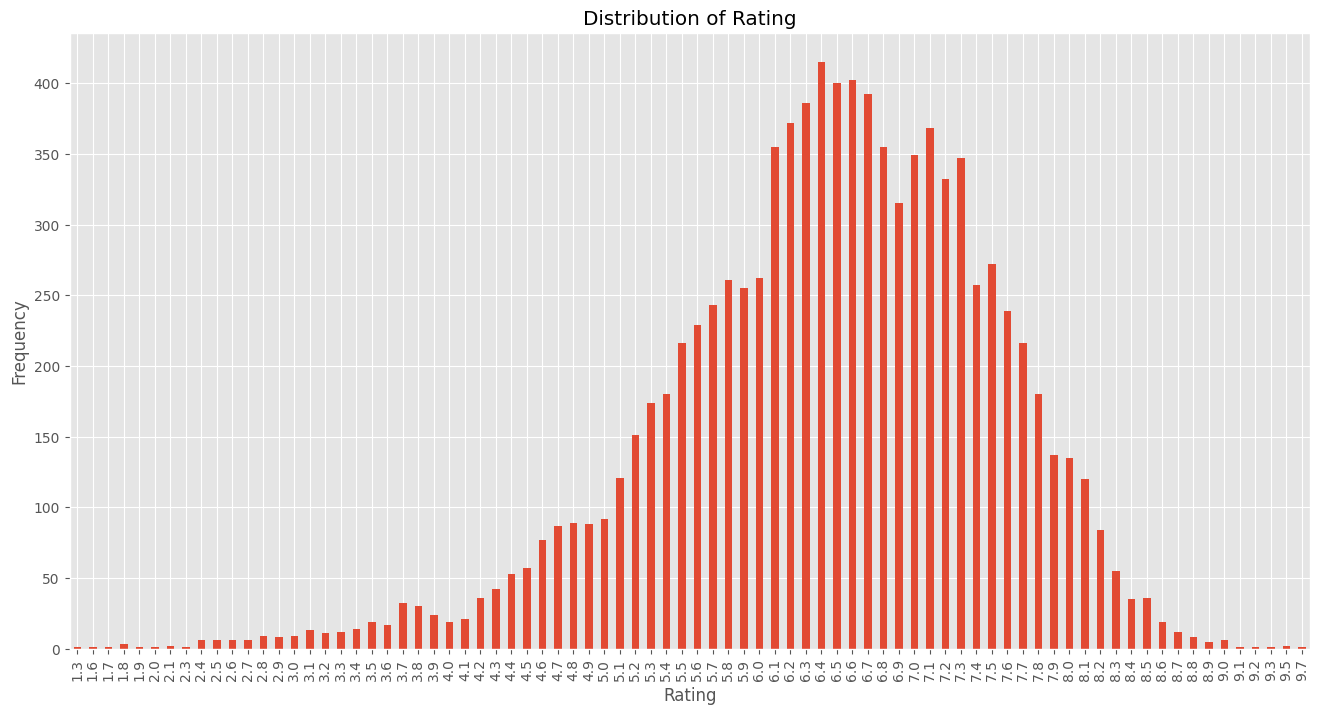

In [4]:
ax = data["Rating"].value_counts().sort_index() \
          .plot(kind = "bar",
               title = "Distribution of Rating",
               figsize = (16, 8))

ax.set_xlabel("Rating")
ax.set_ylabel("Frequency")
plt.show()

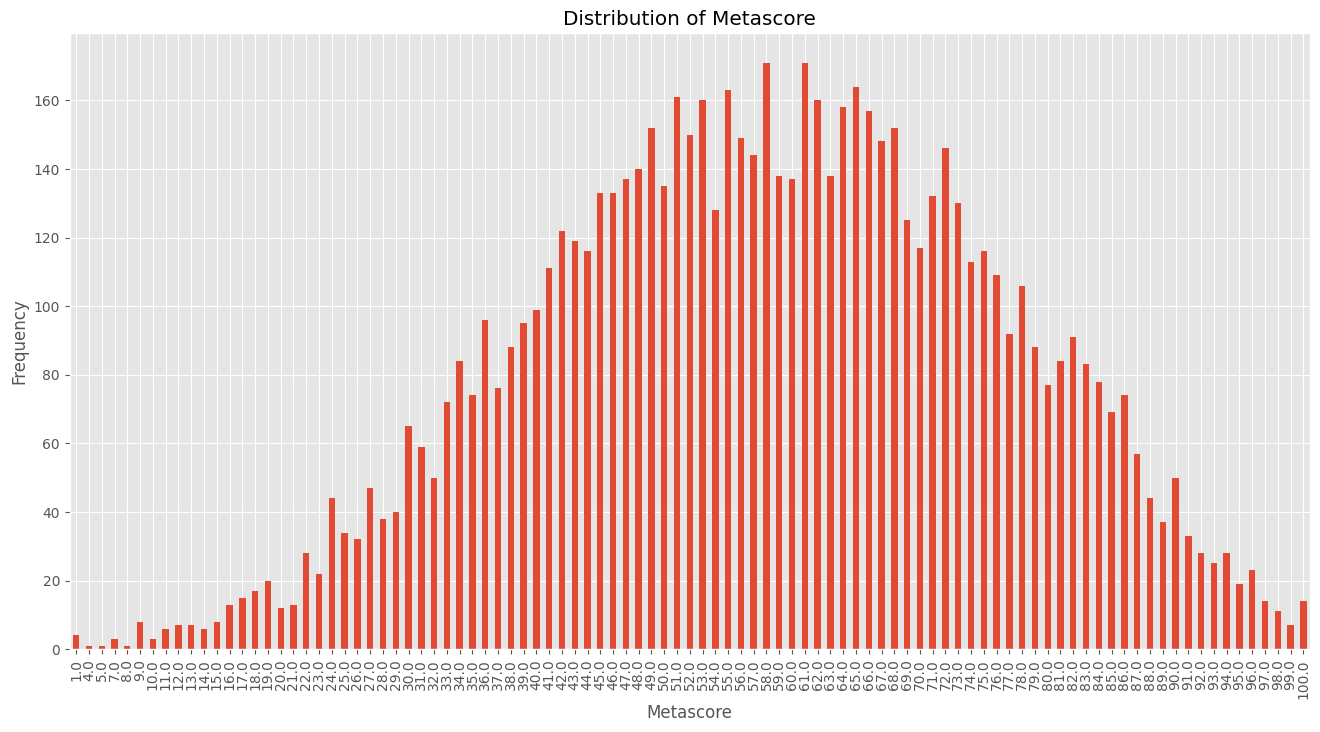

In [5]:
ax = data["Metascore"].value_counts().sort_index() \
          .plot(kind = "bar",
               title = "Distribution of Metascore",
               figsize = (16, 8))

ax.set_xlabel("Metascore")
ax.set_ylabel("Frequency")
plt.show()

# Model 1 : VADER Model for Sentiment Analysis

In [6]:
example = data["Review"][50]
print(example)

The writing, directing, acting and the general production are all top notch. I have not had this much fun watching a movie in a long time. This will go down as a cult classic, so do not miss it.


In [7]:
tokens = nltk.word_tokenize(example)
print(tokens)

['The', 'writing', ',', 'directing', ',', 'acting', 'and', 'the', 'general', 'production', 'are', 'all', 'top', 'notch', '.', 'I', 'have', 'not', 'had', 'this', 'much', 'fun', 'watching', 'a', 'movie', 'in', 'a', 'long', 'time', '.', 'This', 'will', 'go', 'down', 'as', 'a', 'cult', 'classic', ',', 'so', 'do', 'not', 'miss', 'it', '.']


In [8]:
tags = nltk.pos_tag(tokens)
print(tags)

[('The', 'DT'), ('writing', 'NN'), (',', ','), ('directing', 'VBG'), (',', ','), ('acting', 'VBG'), ('and', 'CC'), ('the', 'DT'), ('general', 'JJ'), ('production', 'NN'), ('are', 'VBP'), ('all', 'DT'), ('top', 'JJ'), ('notch', 'NN'), ('.', '.'), ('I', 'PRP'), ('have', 'VBP'), ('not', 'RB'), ('had', 'VBN'), ('this', 'DT'), ('much', 'RB'), ('fun', 'NN'), ('watching', 'VBG'), ('a', 'DT'), ('movie', 'NN'), ('in', 'IN'), ('a', 'DT'), ('long', 'JJ'), ('time', 'NN'), ('.', '.'), ('This', 'DT'), ('will', 'MD'), ('go', 'VB'), ('down', 'RP'), ('as', 'RB'), ('a', 'DT'), ('cult', 'NN'), ('classic', 'JJ'), (',', ','), ('so', 'RB'), ('do', 'VB'), ('not', 'RB'), ('miss', 'VB'), ('it', 'PRP'), ('.', '.')]


In [9]:
entities = nltk.chunk.ne_chunk(tags)
entities.pprint()

(S
  The/DT
  writing/NN
  ,/,
  directing/VBG
  ,/,
  acting/VBG
  and/CC
  the/DT
  general/JJ
  production/NN
  are/VBP
  all/DT
  top/JJ
  notch/NN
  ./.
  I/PRP
  have/VBP
  not/RB
  had/VBN
  this/DT
  much/RB
  fun/NN
  watching/VBG
  a/DT
  movie/NN
  in/IN
  a/DT
  long/JJ
  time/NN
  ./.
  This/DT
  will/MD
  go/VB
  down/RP
  as/RB
  a/DT
  cult/NN
  classic/JJ
  ,/,
  so/RB
  do/VB
  not/RB
  miss/VB
  it/PRP
  ./.)


In [10]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

SIA = SentimentIntensityAnalyzer()

/opt/conda/lib/python3.10/site-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [11]:
SIA.polarity_scores(example)

{'neg': 0.0, 'neu': 0.825, 'pos': 0.175, 'compound': 0.7011}

In [12]:
result = {}
for i, row in tqdm(data.iterrows(), total = len(data)):
    try:
        review = row["Review"]
        title = row["Title"]
        result[title] = SIA.polarity_scores(review)
    except:
        continue

  0%|          | 0/10000 [00:00<?, ?it/s]

In [13]:
vaders = pd.DataFrame(result).T
vaders = vaders.reset_index().rename(columns={"index" : "Title"})
vaders = vaders.merge(data, how='left')

In [14]:
vaders.head()

Title    neg    neu    pos  compound  \
0                    The Idea of You  0.073  0.791  0.136    0.8934   
1  Kingdom of the Planet of the Apes  0.037  0.736  0.226    0.9792   
2                          Unfrosted  0.120  0.652  0.228    0.9636   
3                       The Fall Guy  0.051  0.624  0.324    0.9939   
4                        Challengers  0.035  0.848  0.117    0.9231   

                                              Poster    Year Certificate  \
0  https://m.media-amazon.com/images/M/MV5BYWRkZj...  2023.0           R   
1  https://m.media-amazon.com/images/M/MV5BZGI4NT...  2023.0       PG-13   
2  https://m.media-amazon.com/images/M/MV5BZjIyOT...  2023.0       PG-13   
3  https://m.media-amazon.com/images/M/MV5BMjA5Zj...  2023.0       PG-13   
4  https://m.media-amazon.com/images/M/MV5BNTk1MT...  2023.0           R   

   Duration (min)                       Genre  Rating  Metascore  \
0           115.0      Comedy, Drama, Romance     6.4       67.0   
1           145.0   Action, Adventure, Sci-Fi     7.3       66.0   
2            97.0  Biography, Comedy, History     5.5       42.0   
3           126.0       Action, Comedy, Drama     7.3       73.0   
4           131.0       Drama, Romance, Sport     7.7       82.0   

            Director                                               Cast  \
0  Michael Showalter  Anne Hathaway, Nicholas Galitzine, Ella Rubin,...   
1           Wes Ball  Owen Teague, Freya Allan, Kevin Durand, Peter ...   
2     Jerry Seinfeld  Isaac Bae, Jerry Seinfeld, Chris Rickett, Rach...   
3       David Leitch  Ryan Gosling, Emily Blunt, Aaron Taylor-Johnso...   
4    Luca Guadagnino  Zendaya, Mike Faist, Josh O'Connor, Darnell Ap...   

    Votes                                        Description Review Count  \
0  28,744  Solène, a 40-year-old single mom, begins an un...          166   
1  22,248  Many years after the reign of Caesar, a young ...          183   
2  18,401  In 1963 Michigan, business rivals Kellogg's an...          333   
3  38,953  A down-and-out stuntman must find the missing ...          384   
4  32,517  Tashi, a former tennis prodigy turned coach, t...          194   

                             Review Title  \
0                    Hypocrisy as an idea   
1  A phenomenal start to another trilogy!   
2                               not funny   
3         Everything you needed and more!   
4             Watch "Match Point" instead   

                                              Review  
0  This film, as well as the reaction to it, is a...  
1  I'm a big fan of all the planet of the apes, a...  
2  Pretty much the worst criticism you can lay on...  
3  Just got out of the Austin premier at SXSW and...  
4  This is a tough one. I liked the concept and t...

## Analysis of results

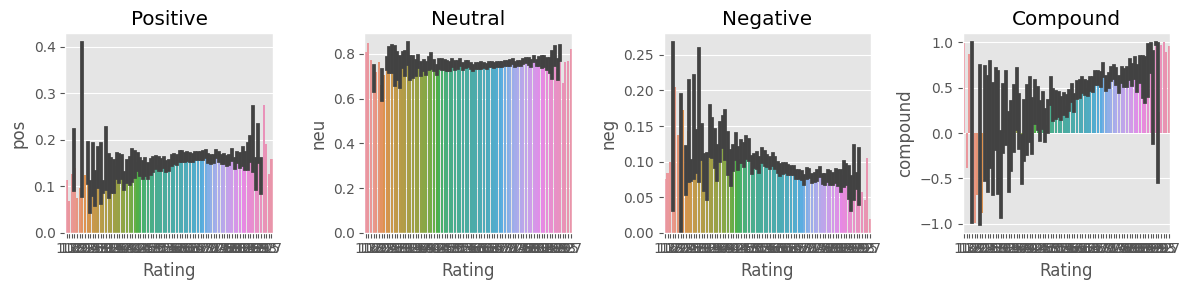

In [15]:
fig, axs = plt.subplots(1, 4, figsize=(12, 3))
sns.barplot(data=vaders, x='Rating', y='pos', ax=axs[0])
sns.barplot(data=vaders, x='Rating', y='neu', ax=axs[1])
sns.barplot(data=vaders, x='Rating', y='neg', ax=axs[2])
sns.barplot(data=vaders, x='Rating', y='compound', ax=axs[3])
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
axs[3].set_title('Compound')
plt.tight_layout()
plt.show()

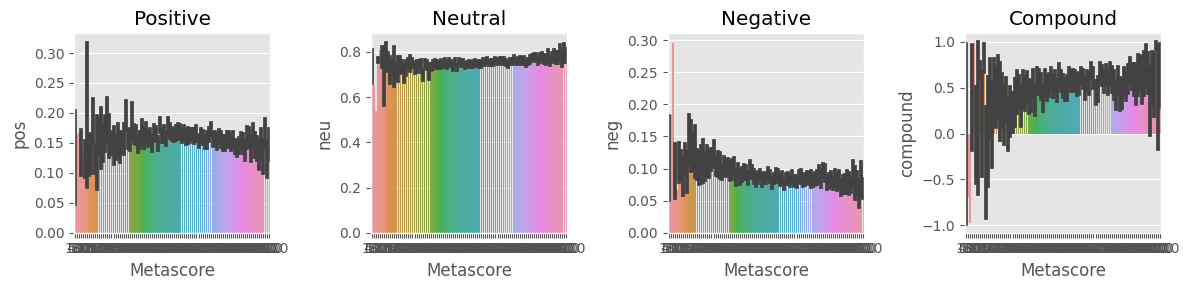

In [16]:
fig, axs = plt.subplots(1, 4, figsize=(12, 3))
sns.barplot(data=vaders, x='Metascore', y='pos', ax=axs[0])
sns.barplot(data=vaders, x='Metascore', y='neu', ax=axs[1])
sns.barplot(data=vaders, x='Metascore', y='neg', ax=axs[2])
sns.barplot(data=vaders, x='Metascore', y='compound', ax=axs[3])
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
axs[3].set_title('Compound')
plt.tight_layout()
plt.show()

# Model 2 : Twitter-roBERTa-base model for Sentiment Analysis

In [17]:
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

In [18]:
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

config.json:   0%|          | 0.00/747 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/150 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/499M [00:00<?, ?B/s]

/opt/conda/lib/python3.10/site-packages/torch/_utils.py:831: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  return self.fget.__get__(instance, owner)()


In [19]:
encoded_text = tokenizer(example, return_tensors = "pt")
output = model(**encoded_text)
scores = output[0][0].detach().numpy()
scores = softmax(scores)
scores_dict = {
    "roberta_neg" : scores[0],
    "roberta_neu" : scores[1],
    "roberta_pos" : scores[2]
}
print(scores_dict)

{'roberta_neg': 0.0068043885, 'roberta_neu': 0.022278456, 'roberta_pos': 0.97091717}


In [20]:
def polarity_scores_roberta(example):
    encoded_text = tokenizer(example, return_tensors='pt')
    output = model(**encoded_text)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)
    scores_dict = {
        'roberta_neg' : scores[0],
        'roberta_neu' : scores[1],
        'roberta_pos' : scores[2]
    }
    return scores_dict

In [21]:
result = {}
for i, row in tqdm(data.iterrows(), total=len(data)):
    try:
        review = row["Review"]
        title = row["Title"]
        vader_result = SIA.polarity_scores(review)
        vader_result_rename = {}
        for key, value in vader_result.items():
            vader_result_rename[f"vader_{key}"] = value
        roberta_result = polarity_scores_roberta(review)
        both = {**vader_result_rename, **roberta_result}
        result[title] = both
    except:
        continue

  0%|          | 0/10000 [00:00<?, ?it/s]

In [22]:
results_df = pd.DataFrame(result).T
results_df = results_df.reset_index().rename(columns={'index': 'Title'})
results_df = results_df.merge(data, how='left')

In [23]:
results_df.head()

Title  vader_neg  vader_neu  vader_pos  \
0                    The Idea of You      0.073      0.791      0.136   
1  Kingdom of the Planet of the Apes      0.037      0.736      0.226   
2                          Unfrosted      0.120      0.652      0.228   
3                       The Fall Guy      0.051      0.624      0.324   
4                        Challengers      0.035      0.848      0.117   

   vader_compound  roberta_neg  roberta_neu  roberta_pos  \
0          0.8934     0.492392     0.394763     0.112845   
1          0.9792     0.002662     0.013822     0.983516   
2          0.9636     0.848432     0.129403     0.022165   
3          0.9939     0.002460     0.005785     0.991755   
4          0.9231     0.120991     0.389216     0.489793   

                                              Poster    Year  ...  \
0  https://m.media-amazon.com/images/M/MV5BYWRkZj...  2023.0  ...   
1  https://m.media-amazon.com/images/M/MV5BZGI4NT...  2023.0  ...   
2  https://m.media-amazon.com/images/M/MV5BZjIyOT...  2023.0  ...   
3  https://m.media-amazon.com/images/M/MV5BMjA5Zj...  2023.0  ...   
4  https://m.media-amazon.com/images/M/MV5BNTk1MT...  2023.0  ...   

                        Genre  Rating Metascore           Director  \
0      Comedy, Drama, Romance     6.4      67.0  Michael Showalter   
1   Action, Adventure, Sci-Fi     7.3      66.0           Wes Ball   
2  Biography, Comedy, History     5.5      42.0     Jerry Seinfeld   
3       Action, Comedy, Drama     7.3      73.0       David Leitch   
4       Drama, Romance, Sport     7.7      82.0    Luca Guadagnino   

                                                Cast   Votes  \
0  Anne Hathaway, Nicholas Galitzine, Ella Rubin,...  28,744   
1  Owen Teague, Freya Allan, Kevin Durand, Peter ...  22,248   
2  Isaac Bae, Jerry Seinfeld, Chris Rickett, Rach...  18,401   
3  Ryan Gosling, Emily Blunt, Aaron Taylor-Johnso...  38,953   
4  Zendaya, Mike Faist, Josh O'Connor, Darnell Ap...  32,517   

                                         Description Review Count  \
0  Solène, a 40-year-old single mom, begins an un...          166   
1  Many years after the reign of Caesar, a young ...          183   
2  In 1963 Michigan, business rivals Kellogg's an...          333   
3  A down-and-out stuntman must find the missing ...          384   
4  Tashi, a former tennis prodigy turned coach, t...          194   

                             Review Title  \
0                    Hypocrisy as an idea   
1  A phenomenal start to another trilogy!   
2                               not funny   
3         Everything you needed and more!   
4             Watch "Match Point" instead   

                                              Review  
0  This film, as well as the reaction to it, is a...  
1  I'm a big fan of all the planet of the apes, a...  
2  Pretty much the worst criticism you can lay on...  
3  Just got out of the Austin premier at SXSW and...  
4  This is a tough one. I liked the concept and t...  

[5 rows x 22 columns]

## Analysis of results

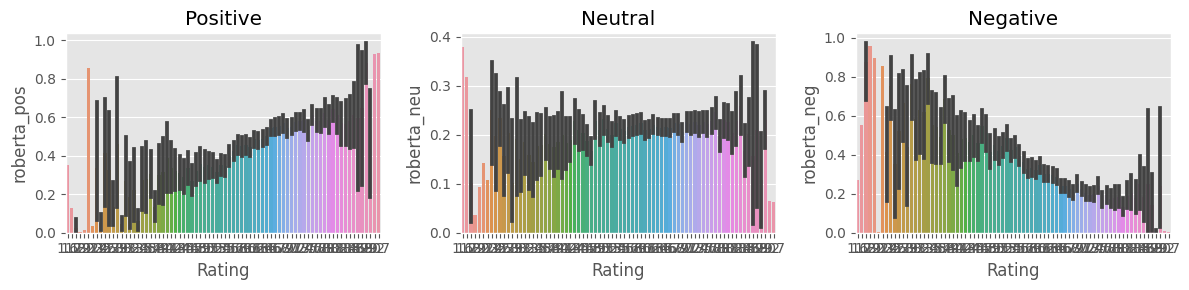

In [24]:
fig, axs = plt.subplots(1, 3, figsize=(12, 3))
sns.barplot(data=results_df, x='Rating', y='roberta_pos', ax=axs[0])
sns.barplot(data=results_df, x='Rating', y='roberta_neu', ax=axs[1])
sns.barplot(data=results_df, x='Rating', y='roberta_neg', ax=axs[2])
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
plt.tight_layout()
plt.show()

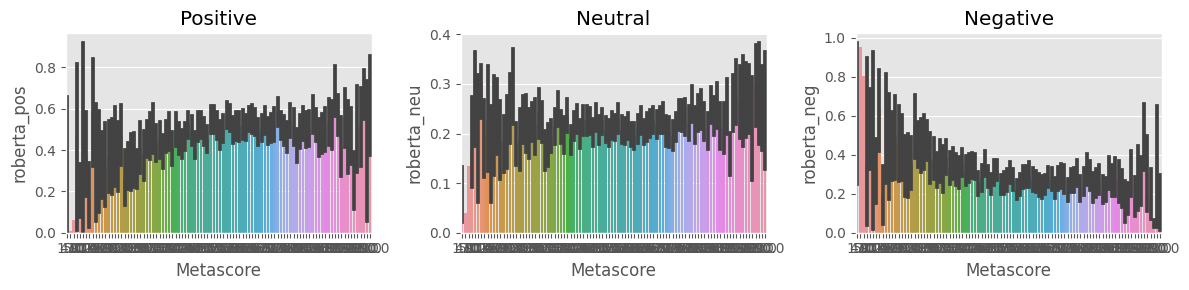

In [25]:
fig, axs = plt.subplots(1, 3, figsize=(12, 3))
sns.barplot(data=results_df, x='Metascore', y='roberta_pos', ax=axs[0])
sns.barplot(data=results_df, x='Metascore', y='roberta_neu', ax=axs[1])
sns.barplot(data=results_df, x='Metascore', y='roberta_neg', ax=axs[2])
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
plt.tight_layout()
plt.show()

# Model 3 : DistilBERT base uncased finetuned SST-2 for Sentiment Analysis

In [26]:
from transformers import pipeline

Pipeline = pipeline("sentiment-analysis")

2024-05-28 01:29:20.332950: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-28 01:29:20.333070: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-28 01:29:20.486869: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

In [27]:
Pipeline(example)[0]

{'label': 'POSITIVE', 'score': 0.9969423413276672}

In [28]:
result = {}
for i, row in tqdm(data.iterrows(), total=len(data)):
    try:
        review = row["Review"]
        title = row["Title"]
        result[title] = Pipeline(review)[0]
    except:
        continue

  0%|          | 0/10000 [00:00<?, ?it/s]

Token indices sequence length is longer than the specified maximum sequence length for this model (727 > 512). Running this sequence through the model will result in indexing errors


In [29]:
results_hf = pd.DataFrame(result).T
results_hf = results_hf.reset_index().rename(columns={'index': 'Title'})
results_hf = results_hf.merge(results_df, how='left')

In [30]:
results_hf.head()

Title     label     score  vader_neg  \
0                    The Idea of You  POSITIVE  0.998336      0.073   
1  Kingdom of the Planet of the Apes  POSITIVE  0.999163      0.037   
2                          Unfrosted  NEGATIVE  0.997976      0.120   
3                       The Fall Guy  POSITIVE  0.999768      0.051   
4                        Challengers  NEGATIVE  0.980236      0.035   

   vader_neu  vader_pos  vader_compound  roberta_neg  roberta_neu  \
0      0.791      0.136          0.8934     0.492392     0.394763   
1      0.736      0.226          0.9792     0.002662     0.013822   
2      0.652      0.228          0.9636     0.848432     0.129403   
3      0.624      0.324          0.9939     0.002460     0.005785   
4      0.848      0.117          0.9231     0.120991     0.389216   

   roberta_pos  ...                       Genre  Rating Metascore  \
0     0.112845  ...      Comedy, Drama, Romance     6.4      67.0   
1     0.983516  ...   Action, Adventure, Sci-Fi     7.3      66.0   
2     0.022165  ...  Biography, Comedy, History     5.5      42.0   
3     0.991755  ...       Action, Comedy, Drama     7.3      73.0   
4     0.489793  ...       Drama, Romance, Sport     7.7      82.0   

            Director                                               Cast  \
0  Michael Showalter  Anne Hathaway, Nicholas Galitzine, Ella Rubin,...   
1           Wes Ball  Owen Teague, Freya Allan, Kevin Durand, Peter ...   
2     Jerry Seinfeld  Isaac Bae, Jerry Seinfeld, Chris Rickett, Rach...   
3       David Leitch  Ryan Gosling, Emily Blunt, Aaron Taylor-Johnso...   
4    Luca Guadagnino  Zendaya, Mike Faist, Josh O'Connor, Darnell Ap...   

    Votes                                        Description Review Count  \
0  28,744  Solène, a 40-year-old single mom, begins an un...          166   
1  22,248  Many years after the reign of Caesar, a young ...          183   
2  18,401  In 1963 Michigan, business rivals Kellogg's an...          333   
3  38,953  A down-and-out stuntman must find the missing ...          384   
4  32,517  Tashi, a former tennis prodigy turned coach, t...          194   

                             Review Title  \
0                    Hypocrisy as an idea   
1  A phenomenal start to another trilogy!   
2                               not funny   
3         Everything you needed and more!   
4             Watch "Match Point" instead   

                                              Review  
0  This film, as well as the reaction to it, is a...  
1  I'm a big fan of all the planet of the apes, a...  
2  Pretty much the worst criticism you can lay on...  
3  Just got out of the Austin premier at SXSW and...  
4  This is a tough one. I liked the concept and t...  

[5 rows x 24 columns]

## Analysis of results

In [31]:
results_hf["label"].value_counts()

label
POSITIVE    4879
NEGATIVE    2687
Name: count, dtype: int64

<Axes: xlabel='label', ylabel='Rating'>

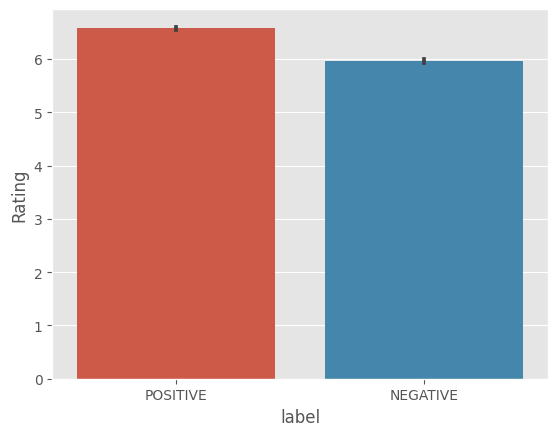

In [32]:
sns.barplot(results_hf, x = "label", y = "Rating")

<Axes: xlabel='label', ylabel='Metascore'>

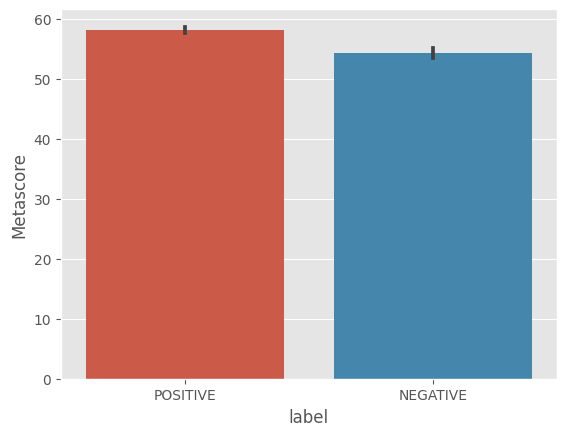

In [33]:
sns.barplot(results_hf, x = "label", y = "Metascore")

# Comparison of results of all models

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to 

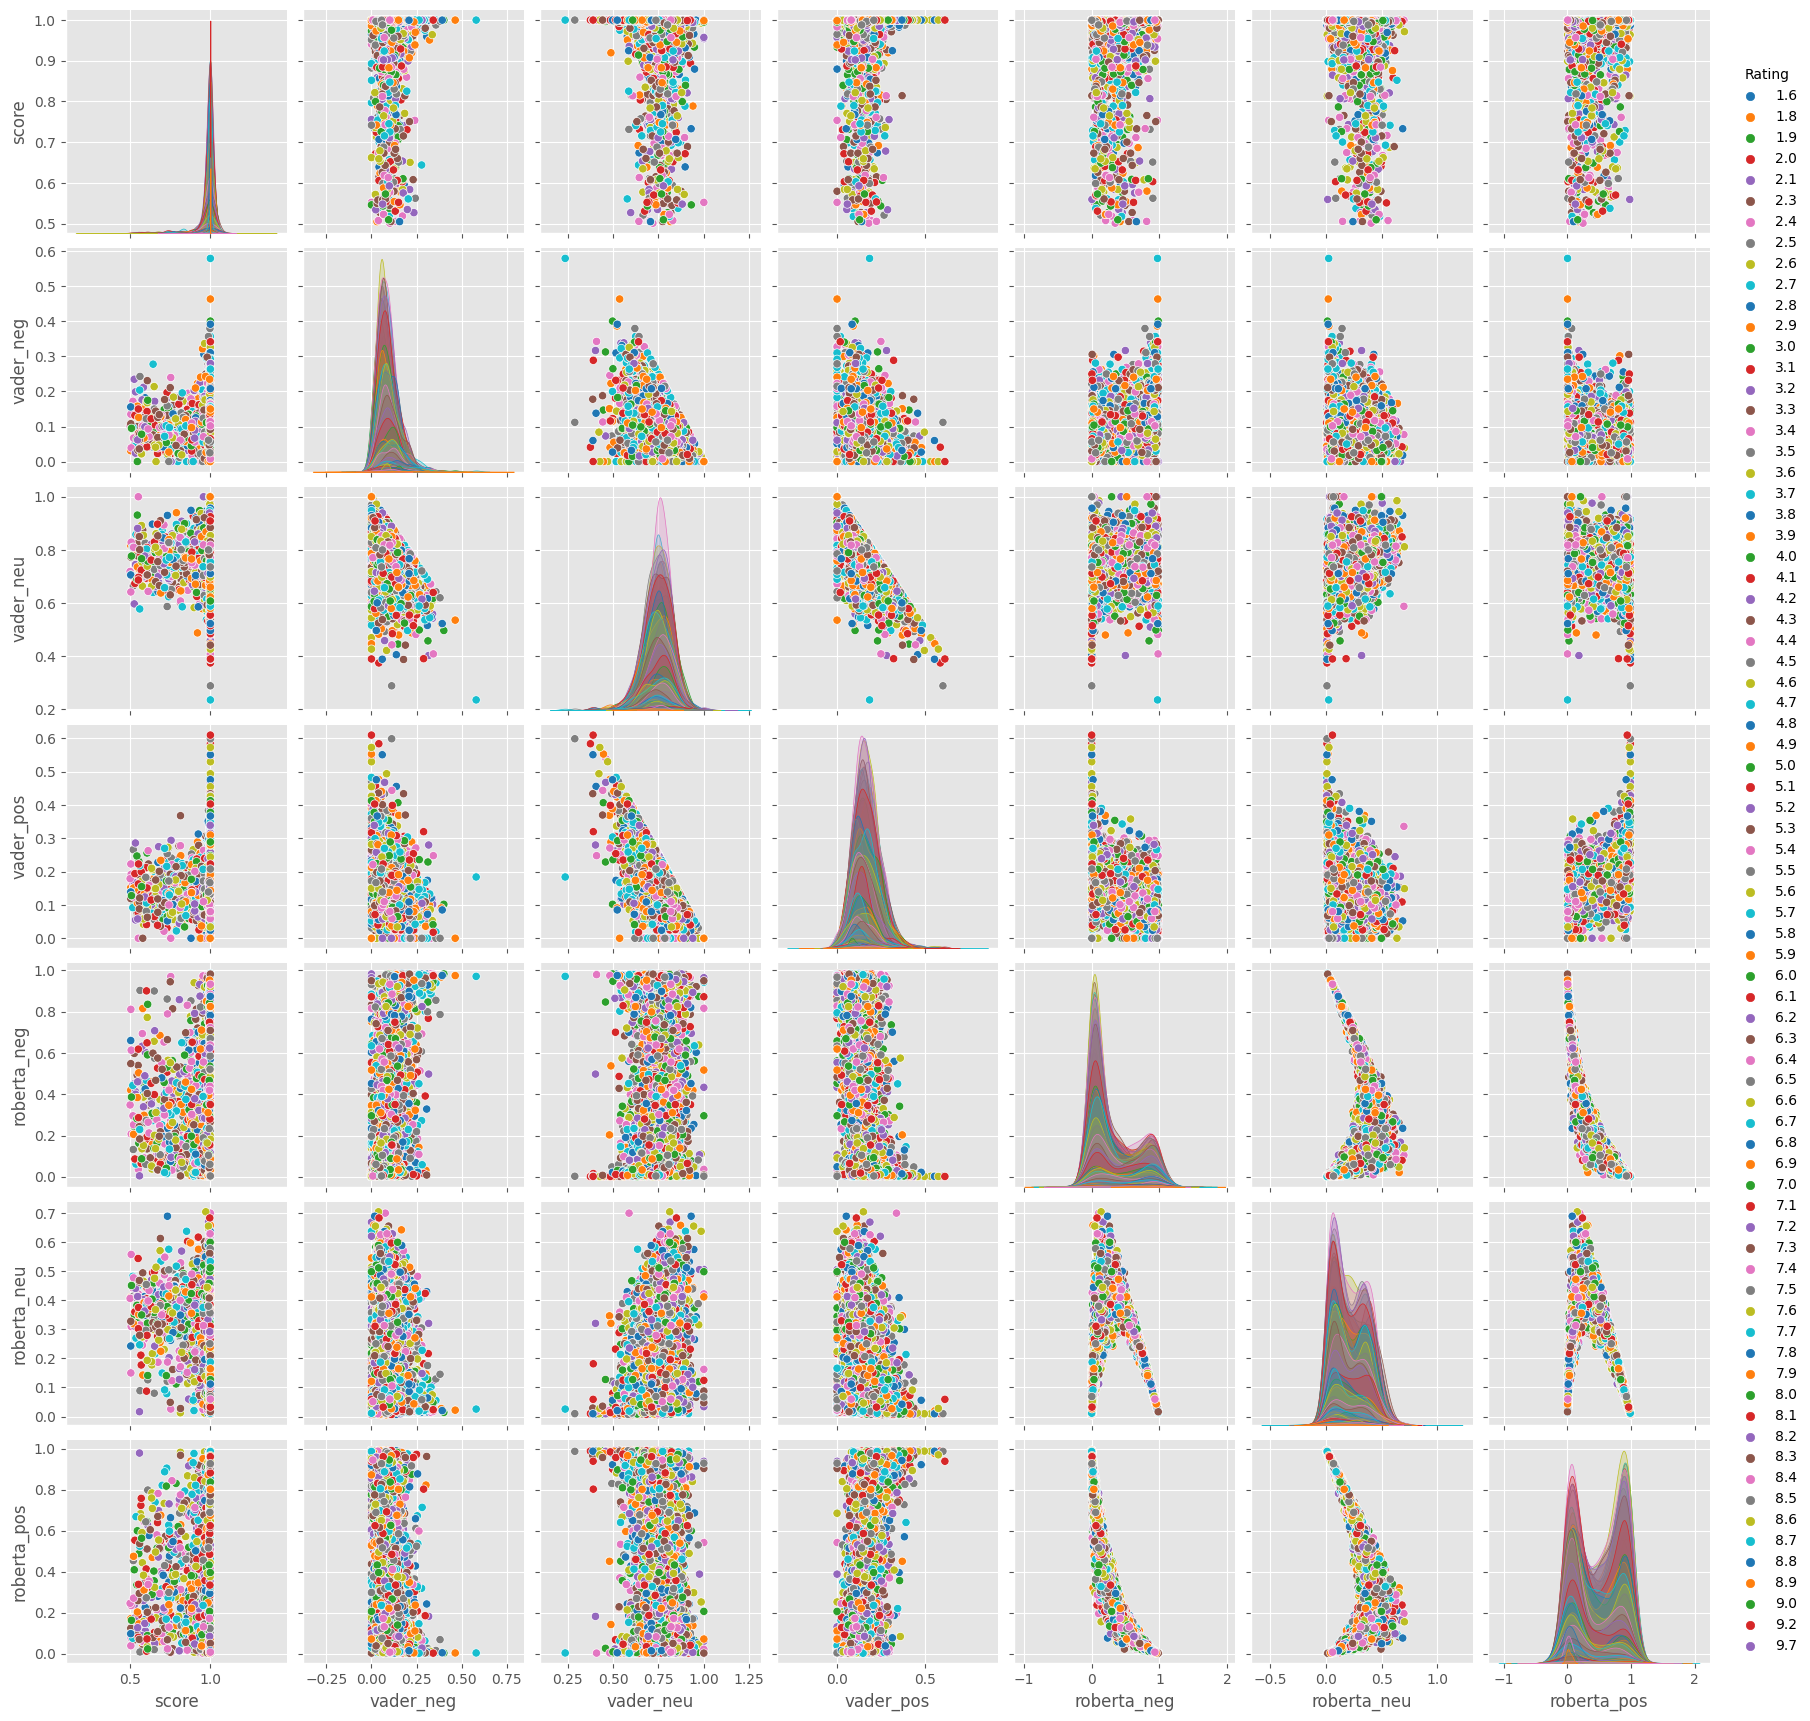

In [34]:
sns.pairplot(data=results_hf,
             vars=['score', 'vader_neg', 'vader_neu', 'vader_pos',
                  'roberta_neg', 'roberta_neu', 'roberta_pos'],
            hue='Rating',
            palette='tab10')
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to 

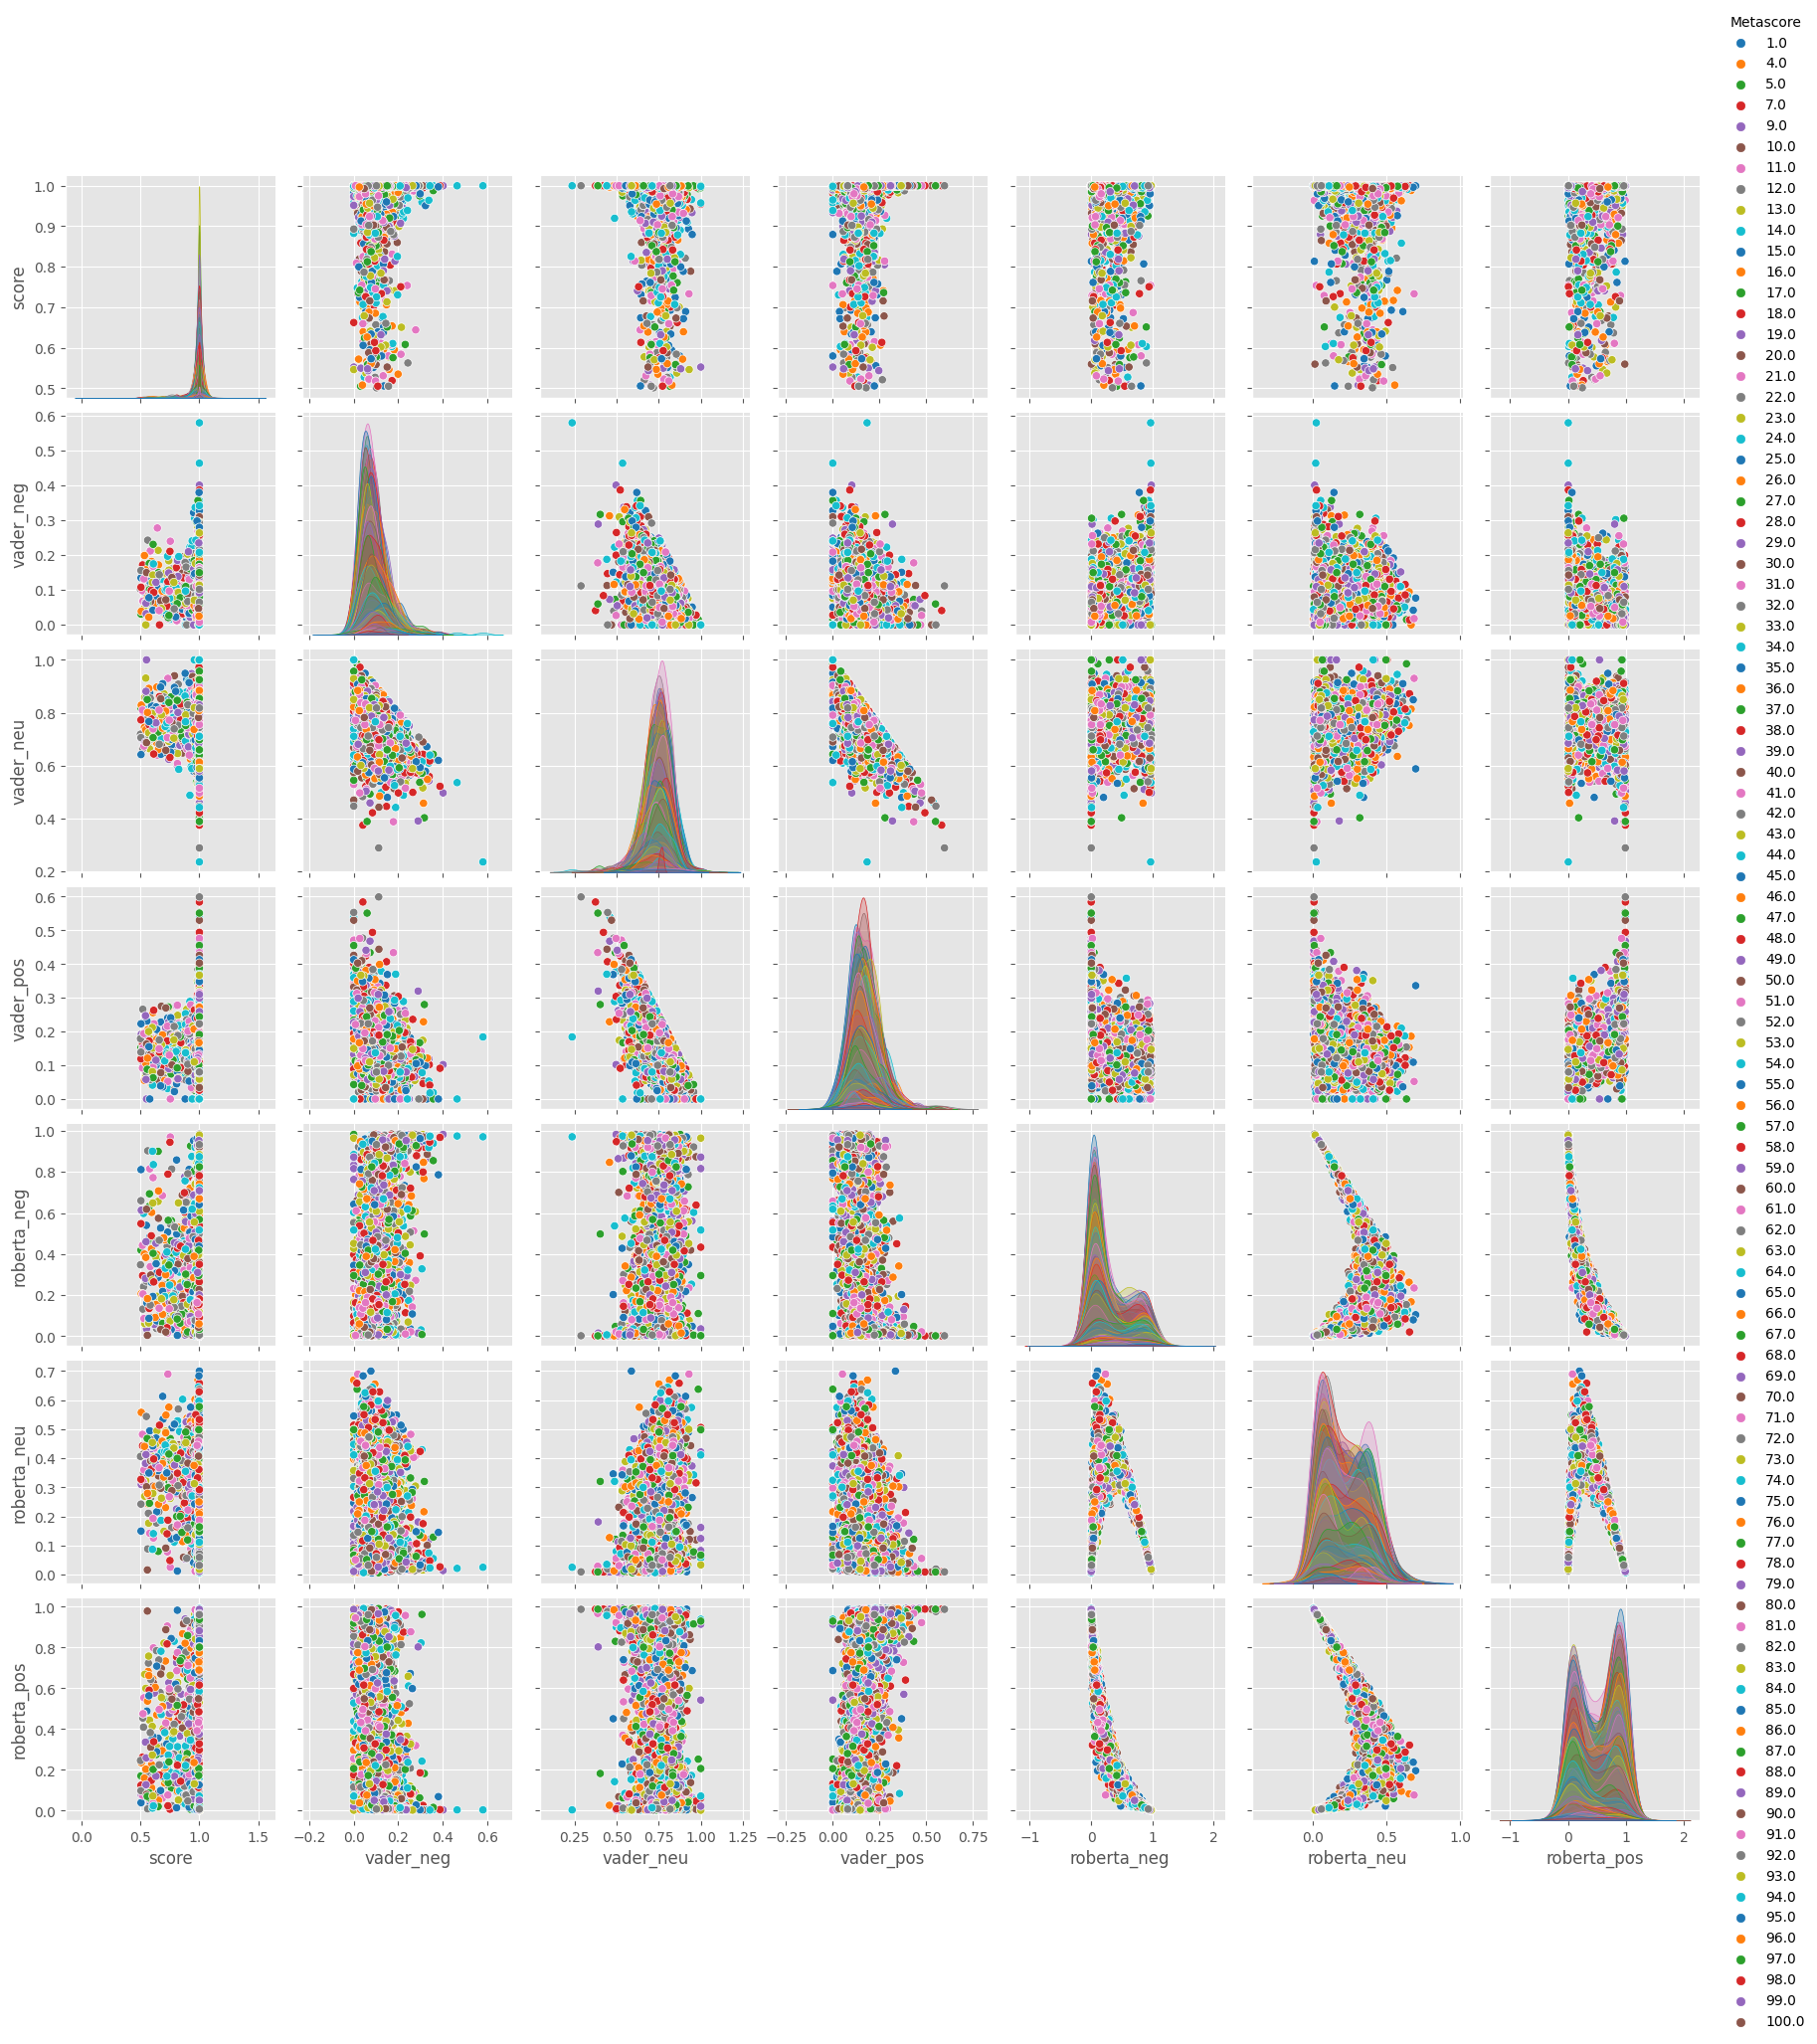

In [35]:
sns.pairplot(data=results_hf,
             vars=['score', 'vader_neg', 'vader_neu', 'vader_pos',
                  'roberta_neg', 'roberta_neu', 'roberta_pos'],
            hue='Metascore',
            palette='tab10')
plt.show()